In [1]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from sklearn.linear_model import LinearRegression
import csv

In [4]:
behav_df = pd.read_csv('../../../../../Downloads/RF1SocialRewardProce-ScoringFinishedStudy_DATA_LABELS_2023-05-09_1701.csv')
pd.set_option('display.max_columns', None)

behav_df['ios_F_S'] = behav_df['IOS friend'] - behav_df['IOS stranger']
behav_df

,Subject ID,Event Name,Planfullness Total Score,scd_score_total,EROS Other Score,EROS Self Score,"NIH disadvantaged y/n Y=1, N=0",SUSD Mania Scale (sum),SUSD Depression Scale (sum),SOGS total score,TEI Subscale wellbeing,TEI Subscale selfcontrol,TEI Subscale emotionality,TEI Subscale sociability,TEI Total or global trait emotional intelligence,SCAARED - Total Score (Sum),SCAARED - Somatic/Panic/Agoraphibia Score (Sum),SCAARED - Generalized Anxiety Disorder Score (Sum),SCAARED - Separation Anxiety Disorder Score (Sum),SCAARED - Social Anxiety Disorder Score (Sum),AQ subscale Social Skill,AQ subscale Attention Switching,AQ subscale Attention to detail,AQ subscale Communication,AQ subscale Imagination,AQ Total,IOS stranger,IOS friend,IOS computer,PANAS Prescan Positive Total,PANAS Prescan Negative Total,NORC(NODS) lifetime total score,NORC(NODS) past year total score,MSPSS Retest Sum,MSPSS Friends Sub-Scale,MSPSS Family Sub-Scale,MSPSS Significant Other Sub-Scale,Sum Score NBS (Range from 1-5),BSMAS Total (sum),GS Total,Total Sum,GTI score,PANAS_Postscan Positive Total,PANAS Postscan Negative Total,CRT total score,Total Sum .1,CTQ-SF - Emotional Abuse Score,CTQ-SF - Emotional Abuse Score CUT OFF,CTQ-SF - Physical Abuse Score,CTQ-SF - Physical Abuse Score CUT OFF,CTQ-SF - Sexual Abuse Score,CTQ-SF - Sexual Abuse Score CUT OFF,CTQ-SF - Emotional Neglect Score,CTQ-SF - Emotional Neglect Score CUT OFF,CTQ-SF - Physical Neglect Score,CTQ-SF - Physical Neglect Score CUT OFF,"CTQ-SF Q10, revised (for Minimzation/Denial Score)","CTQ-SF Q16, revised (for Minimzation/Denial Score)","CTQ-SF Q22, revised (for Minimzation/Denial Score)",CTQ-SF - Minimization/Denial Score,CTQ-SF Total Score (Sum),CTQ-SF Total Score (Sum) - CUTOFF,Parental monitoring and involvement (Sum),Parental predictability (Sum),Parental environment (Sum),Physical environment (Sum),Safety and security (Sum),Overall - Sum of all subscales.,Race,Ethnicity,Age,Gender,ios_F_S
0,10369,Subject Information,3.670000,0.75,4.56,3.44,0,0,8,1,3.50,3.830000,5.130,4.670000,4.30,18,5,10,0,3,3,5,5,6,4,23,1,4,1,26.0,10.0,1,0,NaN,NaN,NaN,NaN,2.7,13,2.63,94,NaN,27,11,44.05,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,8991,2997.0,999.0,999.0,0.0,13986.0,White,Not Hispanic or Latino,31.95,Male,3
1,10391,Subject Information,2.900000,2.65,3.33,2.67,0,0,6,0,NaN,NaN,NaN,NaN,NaN,33,3,12,4,14,3,5,5,6,4,23,2,4,1,NaN,NaN,1,0,NaN,NaN,NaN,NaN,3.7,24,9999.00,66,NaN,24,21,209.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,8991,2997.0,999.0,999.0,0.0,13986.0,White,Not Hispanic or Latino,44.21,Female,2
2,10402,Subject Information,3.530000,2.05,3.56,2.67,0,4,6,0,NaN,NaN,NaN,NaN,NaN,10,0,8,0,2,3,5,5,6,4,23,2,4,5,22.0,14.0,2,0,NaN,NaN,NaN,NaN,2.8,22,3.71,89,NaN,30,14,104.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,8991,2997.0,999.0,999.0,0.0,13986.0,Black or African American,Not Hispanic or Latino,35.94,Male,2
3,10418,Subject Information,3.130000,1.60,4.22,3.44,0,0,2,4,5.67,5.330000,5.250,4.830000,5.10,16,4,2,0,10,3,5,5,6,4,23,2,3,3,26.0,11.0,1,0,NaN,NaN,NaN,NaN,2.6,7,4.20,90,NaN,24,11,127.00,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,8991,2997.0,999.0,999.0,0.0,13986.0,White,Not Hispanic or Latino,68.64,Female,1
4,10462,Subject Information,3.970000,0.50,4.67,3.44,1,4,3,0,NaN,NaN,NaN,NaN,NaN,5,0,5,0,0,3,5,5,6,4,23,1,3,1,27.0,10.0,1,0,NaN,NaN,NaN,NaN,3.2,8,3.14,90,NaN,25,10,110.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,8991,2997.0,999.0,999.0,0.0,13986.0,Black or African American,Not Hispanic or Latino,62.04,Male,2
5,10478,Subject Information,3.330000,2.85,3.56,4.22,0,6,3,0,NaN,NaN,NaN,NaN,NaN,37,9,11,5,12,3,5,5,6,4,23,3,7,4,18.0,11.0,0,0,NaN,NaN,NaN,NaN,3.6,10,4.34,82,NaN,18,13,109.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,8991,2997.0,999.0,999.0,0.0,13986.0,Asian,Not Hispanic or Latino,27.90,Female,4
6,10486,Subject Information,3.830000,2.95,4.33,3.90,0,4,4,0,4.33,

,Subject ID,Planfullness Total Score,scd_score_total,EROS Other Score,EROS Self Score,"NIH disadvantaged y/n Y=1, N=0",SUSD Mania Scale (sum),SUSD Depression Scale (sum),SOGS total score,TEI Subscale wellbeing,TEI Subscale selfcontrol,TEI Subscale emotionality,TEI Subscale sociability,TEI Total or global trait emotional intelligence,SCAARED - Total Score (Sum),SCAARED - Somatic/Panic/Agoraphibia Score (Sum),SCAARED - Generalized Anxiety Disorder Score (Sum),SCAARED - Separation Anxiety Disorder Score (Sum),SCAARED - Social Anxiety Disorder Score (Sum),AQ subscale Social Skill,AQ subscale Attention Switching,AQ subscale Attention to detail,AQ subscale Communication,AQ subscale Imagination,AQ Total,IOS stranger,IOS friend,IOS computer,PANAS Prescan Positive Total,PANAS Prescan Negative Total,NORC(NODS) lifetime total score,NORC(NODS) past year total score,MSPSS Retest Sum,MSPSS Friends Sub-Scale,MSPSS Family Sub-Scale,MSPSS Significant Other Sub-Scale,Sum Score NBS (Range from 1-5),BSMAS Total (sum),GS Total,Total Sum,GTI score,PANAS_Postscan Positive Total,PANAS Postscan Negative Total,CRT total score,Total Sum .1,CTQ-SF - Emotional Abuse Score,CTQ-SF - Emotional Abuse Score CUT OFF,CTQ-SF - Physical Abuse Score,CTQ-SF - Physical Abuse Score CUT OFF,CTQ-SF - Sexual Abuse Score,CTQ-SF - Sexual Abuse Score CUT OFF,CTQ-SF - Emotional Neglect Score,CTQ-SF - Emotional Neglect Score CUT OFF,CTQ-SF - Physical Neglect Score,CTQ-SF - Physical Neglect Score CUT OFF,"CTQ-SF Q10, revised (for Minimzation/Denial Score)","CTQ-SF Q16, revised (for Minimzation/Denial Score)","CTQ-SF Q22, revised (for Minimzation/Denial Score)",CTQ-SF - Minimization/Denial Score,CTQ-SF Total Score (Sum),CTQ-SF Total Score (Sum) - CUTOFF,Parental monitoring and involvement (Sum),Parental predictability (Sum),Parental environment (Sum),Physical environment (Sum),Safety and security (Sum),Overall - Sum of all subscales.,Age,ios_F_S
Subject ID,1.000000,0.149211,0.115457,0.232024,0.230531,-0.051858,0.122673,-0.053638,-0.394656,0.456620,0.244455,0.153753,-0.242945,0.232225,0.034172,0.114044,0.055941,0.172172,-0.179159,-0.223492,-0.223492,-0.223492,-0.223492,-0.223492,-0.223492,0.235077,0.338266,-0.378774,0.412363,0.108551,-0.176573,NaN,0.609742,0.661714,0.225301,0.773624,-0.030477,-0.430828,-0.030446,0.425387,-0.152582,0.121164,-0.503625,-0.509286,-0.514010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223492,NaN,NaN,NaN,NaN,NaN,NaN,-0.023920,0.111457
Planfullness Total Score,0.149211,1.000000,0.137623,0.317410,0.326871,0.347684,0.015831,-0.283701,-0.148284,0.237312,0.001957,0.548206,0.353272,0.421918,-0.229136,-0.058943,-0.258766,-0.061087,-0.340259,-0.311278,-0.311278,-0.311278,-0.311278,-0.311278,-0.311278,-0.134687,0.044396,-0.014358,0.262614,-0.190978,-0.056603,NaN,0.019191,0.125273,-0.135897,0.120667,-0.298919,-0.310438,0.162205,0.052172,0.995253,0.171376,-0.359489,-0.180298,-0.476081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.311278,NaN,NaN,NaN,NaN,NaN,NaN,0.208046,0.134534
scd_score_total,0.115457,0.137623,1.000000,0.878690,0.890084,-0.276600,-0.033513,-0.046493,-0.101261,0.064826,-0.233729,0.246195,0.248418,0.139941,0.046715,0.049346,0.055040,0.151463,-0.043468,-0.890321,-0.890321,-0.890321,-0.890321,-0.890321,-0.890321,0.345918,0.320458,0.236648,0.273374,0.284781,-0.010105,NaN,0.427879,0.409776,0.303972,0.399443,0.065025,0.052155,0.384031,-0.165504,0.845472,0.310676,0.232825,-0.014415,-0.304722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.890321,NaN,NaN,NaN,NaN,NaN,NaN,0.174130,0.016341
EROS Other Score,0.232024,0.317410,0.878690,1.000000,0.997955,-0.056972,-0.248144,-0.237865,-0.065938,0.208506,-0.102781,0.434270,0.334696,0.307855,-0.269873,-0.199419,-0.239799,-0.159307,-0.284246,-0.998534,-0.998534,-0.998534,-0.998534,-0.998534,-0.998534,0.297416,0.179476,0.035069,0.300958,0.088394,0.032241,NaN,0.537459,0.487396,0.405168,0.492866,-0.144717,-0.262765,0.463665,0.085992,0.896076,0.251244,-0.076134,-0.028255

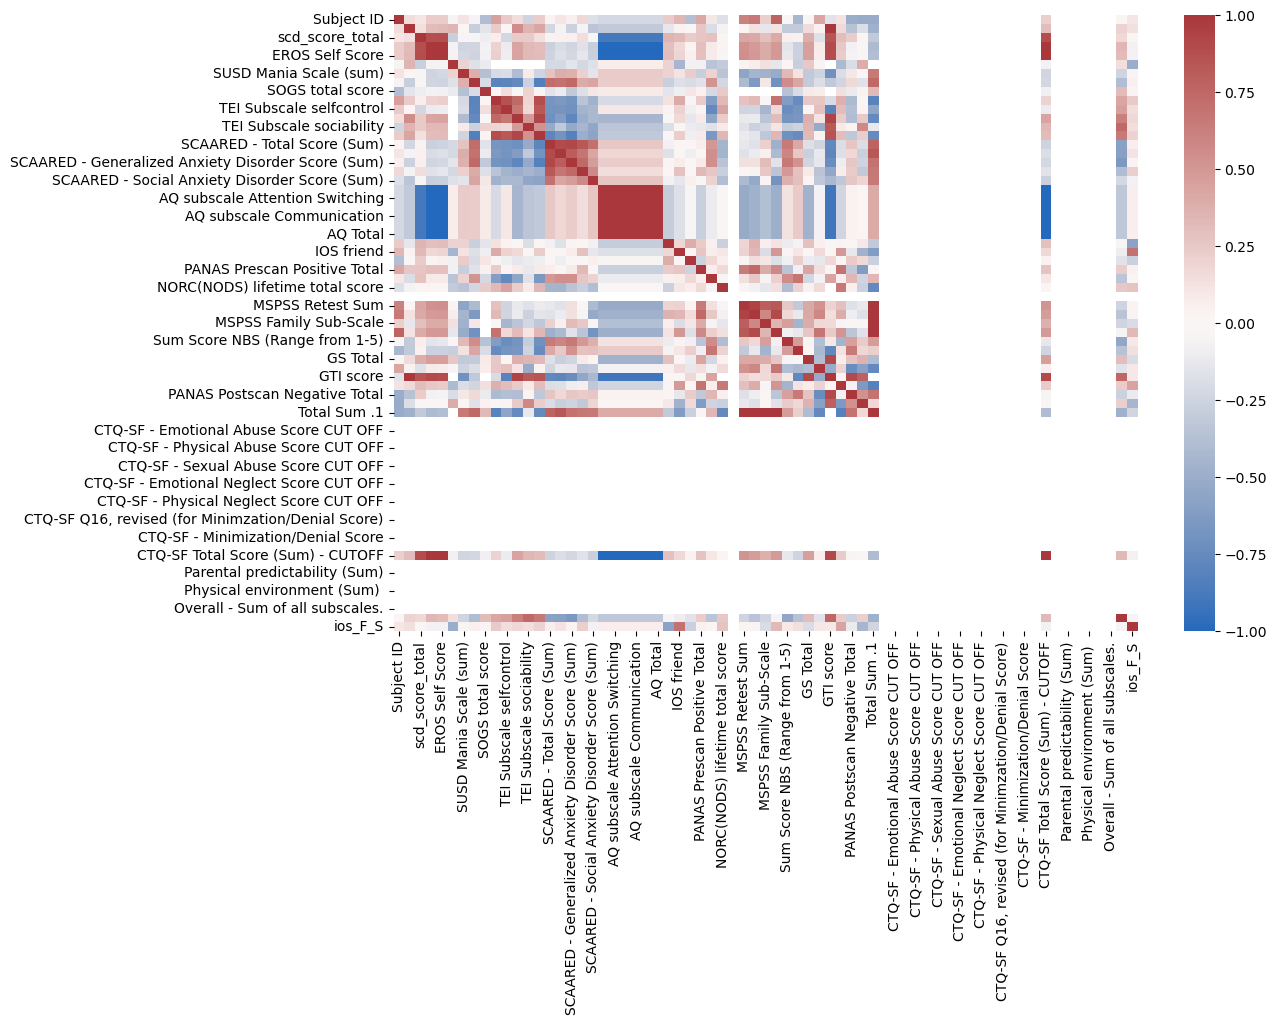

In [7]:
cormat=behav_df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat,cmap='vlag',vmin=-1)
plt.show()

Friend v Stranger closeness, correlated with NIH disadvantage criteria (y/n) 
r: -0.5069476530233237 ; p: 0.01900381865729376


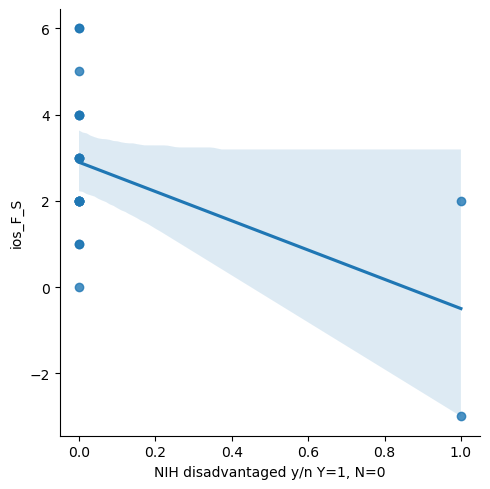

<class 'seaborn.axisgrid.FacetGrid'>


In [8]:
r,p = stats.pearsonr(behav_df['ios_F_S'], behav_df['NIH disadvantaged y/n Y=1, N=0'])
print("Friend v Stranger closeness, correlated with NIH disadvantage criteria (y/n) \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ios_F_S",x="NIH disadvantaged y/n Y=1, N=0", data=behav_df, order=1)
plt.show()
print(type(fig))